# GUN VIOLENCE - MASS/SPREE SHOOTINGS (2012 -2023), USA ANALYTICS
##BY
#OLUWATOYIN OLAEGBE
##INTRODUCTION:
Gun violence is a complex and controversial issue in the United States. Over the years, mass shootings and other forms of gun violence have been responsible for the loss of many innocent lives and have caused significant social and economic impacts. It is therefore important to have a clear understanding of the nature and scope of gun violence to develop effective strategies for prevention and intervention.

This report aims to provide insights into gun violence in the United States by analyzing data on gun violence incidents that occurred between 2012 and 2022. The data includes information on the location, type, and perpetrator characteristics of the incidents, as well as the number of fatalities and injuries. The insights from this report can be used to inform policy decisions and guide future research on gun violence prevention.

About Dataset

Dataset contains 141 cases of gun violence from 1982 to March 2023 in the US. The columns in the dataset provide various information about the gun violence incidents, such as the case name, location, date, summary, fatalities, injured, total victims, age of shooter, prior signs of mental health issues, weapons obtained legally, weapon type, race and gender of the shooter, latitude and longitude coordinates, and the type of incident.

link to dataset - https://www.kaggle.com/datasets/nidzsharma/us-mass-shootings-19822023




Import Libraries

In [1]:
#imported pandas and NumPy to enable the manipulation of the data
#imported matplotlib to enable data visualization in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Connect drive and read data 

In [2]:
###Loaded data into pandas DataFrame
#$$Got an error becuase i did  not quote the file path - fixed
#had to upload the file to gooogle colab everytime
#df = pd.read_csv('/content/shooting-1982-2023.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/shooting-1982-2023.csv')

#Understand the data

In [5]:
#trying to see what the data looks like
df.head().T

,0,1,2,3,4
case,Nashville religious school shooting,Michigan State University shooting,Half Moon Bay spree shooting,LA dance studio mass shooting,Virginia Walmart shooting
location,"Nashville, TN","East Lansing, Michigan","Half Moon Bay, California","Monterey Park, California","Chesapeake, Virginia"
date,3-27-23,2-13-23,1-23-23,1-21-23,11-22-22
summary,"Audrey Hale, 28, who was a former student at t...","Anthony D. McRae, 43, opened fire at Berkey Ha...","Chunli Zhao, 67, suspected of carrying out the...","Huu Can Tran, 72, fled the scene in a white va...","Andre Bing, 31, who worked as a supervisor at ..."
fatalities,6,3,7,11,6
injured,1,5,1,10,6
total_victims,6,8,8,21,12
location.1,School,School,workplace,Other,Workplace
age_of_shooter,28,43,67,72,31
prior_signs_mental_health_issues,-,-,-,yes,-


In [6]:
#Getting to know the data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              141 non-null    object
 1   location                          141 non-null    object
 2   date                              141 non-null    object
 3   summary                           141 non-null    object
 4   fatalities                        141 non-null    int64 
 5   injured                           141 non-null    object
 6   total_victims                     141 non-null    object
 7   location.1                        141 non-null    object
 8   age_of_shooter                    141 non-null    object
 9   prior_signs_mental_health_issues  141 non-null    object
 10  mental_health_details             141 non-null    object
 11  weapons_obtained_legally          141 non-null    object
 12  where_obtained        

#Data Cleaning and Validation

In [7]:
#checking for duplicates
df.duplicated().sum()
#no duplicates found

0

In [8]:
#change date column data type to date
df['date'] = pd.to_datetime(df['date'])

<ipython-input-8-292230ad10a2>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


In [9]:
#working with data from 2012 - 2023
df = df[df['year'] >= 2012]

In [10]:
#location = city, state
#splitting location to City and State
location_split = df['location'].str.split(',', expand=True)

In [11]:
df['City'] = location_split[0]
df['State'] = location_split[1]

Create new columns (Day/Month)

In [12]:
df['month_name'] = df['date'].dt.month_name()
df['day_of_week'] = df['date'].dt.day_name()
df.head().T

,0,1,2,3,4
case,Nashville religious school shooting,Michigan State University shooting,Half Moon Bay spree shooting,LA dance studio mass shooting,Virginia Walmart shooting
location,"Nashville, TN","East Lansing, Michigan","Half Moon Bay, California","Monterey Park, California","Chesapeake, Virginia"
date,2023-03-27 00:00:00,2023-02-13 00:00:00,2023-01-23 00:00:00,2023-01-21 00:00:00,2022-11-22 00:00:00
summary,"Audrey Hale, 28, who was a former student at t...","Anthony D. McRae, 43, opened fire at Berkey Ha...","Chunli Zhao, 67, suspected of carrying out the...","Huu Can Tran, 72, fled the scene in a white va...","Andre Bing, 31, who worked as a supervisor at ..."
fatalities,6,3,7,11,6
injured,1,5,1,10,6
total_victims,6,8,8,21,12
location.1,School,School,workplace,Other,Workplace
age_of_shooter,28,43,67,72,31
prior_signs_mental_health_issues,-,-,-,yes,-


In [13]:
#view location.1 distinct
df['location.1'].value_counts()

Other          28
Workplace      26
School         12
workplace       5
Religious       5
Military        4
Other\n         3
religious       1
Airport         1
\nWorkplace     1
Name: location.1, dtype: int64

In [14]:
#replace({'Other\n':'Other','workplace':'Workplace','\nWorkplace':'Workplace','religious': 'Religious'})
df['location.1'] = df['location.1'].replace({'Other\n':'Other','workplace':'Workplace','\nWorkplace':'Workplace','religious': 'Religious'})
#confirm replacements
df['location.1'].value_counts()

Workplace    32
Other        31
School       12
Religious     6
Military      4
Airport       1
Name: location.1, dtype: int64

In [15]:
#rows where age_of_shooter is '-'
mask = df['age_of_shooter'] == '-'
rows_with_dash = df[mask]
print(rows_with_dash)

                                  case                 location       date  \
15   Sacramento County church shooting   Sacramento, California 2022-02-28   
24  Jersey City kosher market shooting  Jersey City, New Jersey 2019-12-10   

                                              summary  fatalities injured  \
15  "A man believed to be meeting his three childr...           4       0   
24  David N. Anderson, 47, and Francine Graham, 50...           4       3   

   total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
15             4  Religious              -                                -   
24             7      Other              -                                -   

    ...   race         gender     latitude     longitude   type  year  \
15  ...      -              M  38.60111019  -121.4189659   Mass  2022   
24  ...  Black  Male & Female    40.707363    -74.083609  Spree  2019   

           City        State month_name day_of_week  
15   Sacramento   Cal

In [16]:
#replacing '-' in age_of_shooter column
#row 24 contains '-' as the age of shooter. the shooter ages can be found in the summary (47/50)
#will replace age with average age 49 of both shooters(to fall in the 35-54 age range)
#no age in summary for row 15, will replace '-' with 0
df.loc[24, 'age_of_shooter'] = 49
df.loc[15, 'age_of_shooter'] = 0
#confirming age of shooter replacements
selected_rows = df.loc[[15, 24], ['age_of_shooter']]
print(selected_rows)

   age_of_shooter
15              0
24             49


In [17]:
#change age_of_shooter Dtype from object to integer
df['age_of_shooter'] = df['age_of_shooter'].astype(int)
#confirm Dtype change
D_type = df['age_of_shooter'].dtypes
print(D_type)

int64


In [18]:
#put the ages in bins and create new column - age_group
# Define the age ranges and labels
df['age_of_shooter'] = df['age_of_shooter'].replace({
    '-': 0
})
df['age_of_shooter'] = df['age_of_shooter'].astype(int)
age_ranges = [0, 10, 18, 39, 59, 120]
age_labels = ['Unknown', 'Teenage', 'Early Adulthood', 'Middle Adulthood', 'Old Age']

# Use the cut() function to categorize the age groups
df['age_group'] = pd.cut(df['age_of_shooter'], bins=age_ranges, labels=age_labels)
df['age_group'].value_counts()

Early Adulthood     52
Middle Adulthood    22
Teenage              6
Old Age              5
Unknown              0
Name: age_group, dtype: int64

In [19]:
#view distinct prior_signs_mental_health_issues
df['prior_signs_mental_health_issues'].value_counts()

-          28
Yes        24
Unclear    18
yes         8
TBD         5
No          2
Unknown     1
Name: prior_signs_mental_health_issues, dtype: int64

In [20]:
#summarise to Yes, No, TBD and Unclear
df['prior_signs_mental_health_issues']=df['prior_signs_mental_health_issues'].replace({
    'yes':'Yes',
    '-': 'Unknown',
    'Unclear':'Unknown',
    "Unclear":'Unknown'
})
#confirm replacements
df['prior_signs_mental_health_issues'].value_counts()

Unknown    47
Yes        32
TBD         5
No          2
Name: prior_signs_mental_health_issues, dtype: int64

In [21]:
# view weapons_obtained_legally distinct
df['weapons_obtained_legally'].value_counts()

Yes                                                                                                                                    38
-                                                                                                                                      17
yes                                                                                                                                     9
TBD                                                                                                                                     7
No                                                                                                                                      6
Unknown                                                                                                                                 4
\nYes                                                                                                                                   2
Kelley passed federal criminal bac

In [22]:
#summarise to Yes, No, TBD and Unclear
df["weapons_obtained_legally"] = df["weapons_obtained_legally"].replace({"-": "Unknown", "yes": "Yes", "\nYes": "Yes",
                                                                         "Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI": "Yes",
                                                                         'Yes ("some of the weapons were purchased legally and some of them may not have been")': "Yes", "Yes ": "Yes"})
#confirm replacements
df["weapons_obtained_legally"].value_counts()

Yes        52
Unknown    21
TBD         7
No          6
Name: weapons_obtained_legally, dtype: int64

In [23]:
#view race distict
df.race.value_counts()

White              31
Black              16
-                  13
Latino              8
Asian               6
white               5
Other               4
Native American     2
White               1
Name: race, dtype: int64

In [24]:
#summarize race to White, Black,Unclear
df['race'] = df['race'].replace({
    'white': 'White',
    'black': 'Black',
    'White ': 'White',
    '-': 'Unclear',
    'unclear': 'Unclear'
})
#confirm replacements
df['race'].value_counts()

White              37
Black              16
Unclear            13
Latino              8
Asian               6
Other               4
Native American     2
Name: race, dtype: int64

In [25]:
#view gender distinct
df.gender.value_counts()

M                                            65
Male                                         16
Male & Female                                 2
F (identified as transgender, per police)     1
F                                             1
Female                                        1
Name: gender, dtype: int64

In [26]:
# sumaarize gender to Male, Female,Male & Female,Male & Female 
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female', 'F (identified as transgender, per police)': "Female (transgender)"})
#view replacements
df['gender'].value_counts()

Male                    81
Male & Female            2
Female                   2
Female (transgender)     1
Name: gender, dtype: int64

In [27]:
#view type distinct
df.type.value_counts()

Mass     75
Spree    11
Name: type, dtype: int64

In [28]:
#validate
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case                              86 non-null     object        
 1   location                          86 non-null     object        
 2   date                              86 non-null     datetime64[ns]
 3   summary                           86 non-null     object        
 4   fatalities                        86 non-null     int64         
 5   injured                           86 non-null     object        
 6   total_victims                     86 non-null     object        
 7   location.1                        86 non-null     object        
 8   age_of_shooter                    86 non-null     int64         
 9   prior_signs_mental_health_issues  86 non-null     object        
 10  mental_health_details             86 non-null     ob

In [29]:
df.head().T

,0,1,2,3,4
case,Nashville religious school shooting,Michigan State University shooting,Half Moon Bay spree shooting,LA dance studio mass shooting,Virginia Walmart shooting
location,"Nashville, TN","East Lansing, Michigan","Half Moon Bay, California","Monterey Park, California","Chesapeake, Virginia"
date,2023-03-27 00:00:00,2023-02-13 00:00:00,2023-01-23 00:00:00,2023-01-21 00:00:00,2022-11-22 00:00:00
summary,"Audrey Hale, 28, who was a former student at t...","Anthony D. McRae, 43, opened fire at Berkey Ha...","Chunli Zhao, 67, suspected of carrying out the...","Huu Can Tran, 72, fled the scene in a white va...","Andre Bing, 31, who worked as a supervisor at ..."
fatalities,6,3,7,11,6
injured,1,5,1,10,6
total_victims,6,8,8,21,12
location.1,School,School,Workplace,Other,Workplace
age_of_shooter,28,43,67,72,31
prior_signs_mental_health_issues,Unknown,Unknown,Unknown,Yes,Unknown


Save cleaned data to CSV

In [30]:
df.to_csv('cleaned_shooting-1982-2023.csv', index=False)


In [31]:
df_clean = pd.read_csv("cleaned_shooting-1982-2023.csv", parse_dates=['date'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case                              86 non-null     object        
 1   location                          86 non-null     object        
 2   date                              86 non-null     datetime64[ns]
 3   summary                           86 non-null     object        
 4   fatalities                        86 non-null     int64         
 5   injured                           86 non-null     object        
 6   total_victims                     86 non-null     object        
 7   location.1                        86 non-null     object        
 8   age_of_shooter                    86 non-null     int64         
 9   prior_signs_mental_health_issues  86 non-null     object        
 10  mental_health_details             86 non-null     ob

#Gun Violence Analysis

Type of Shooting

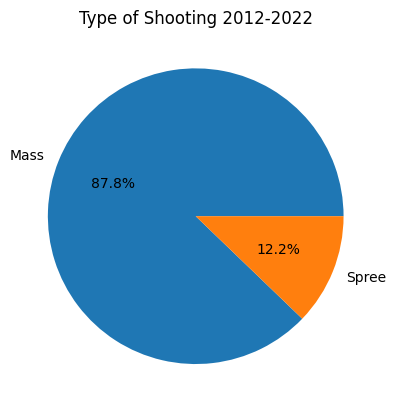

In [33]:
# Filter for years 2012-2022
df_years = df[(df['year'] >= 2012) & (df['year'] <= 2022)]

# Create a pie chart with percentage labels
plt.pie(df_years['type'].value_counts(), 
        labels=df_years['type'].unique(), autopct='%1.1f%%')
plt.title('Type of Shooting 2012-2022')
plt.show()

The analysis of the gun violence data from 2012 to 2022, showed mass shootings accounted for the majority of incidents at 87.8%, while spree shootings represented a much smaller proportion at 12.2%. Effective measures shoud be put in place to prevent tragedies like this from occuring.

Cases by Year

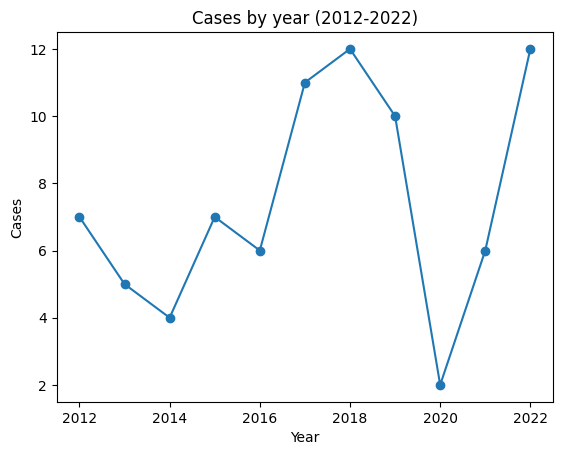

In [34]:
#cases by year 2012-2022
counts = df.year.value_counts().sort_index()
counts = counts.loc[2012:2022]  # filter rows for years 2010-2022
plt.plot(counts.index, counts.values, '-o')
plt.title('Cases by year (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.show()

A significant increase in mass/spree shootings can be seen from 2017 to 2019 until it decreased significantly in 2020 and then increased steadily to 2022.
- This trend suggests that the pandemic in 2020 may have had a significant impact on the occurrence of mass shootings.
- Further analysis on why mass shooting increased in recent years.

Cases By Location

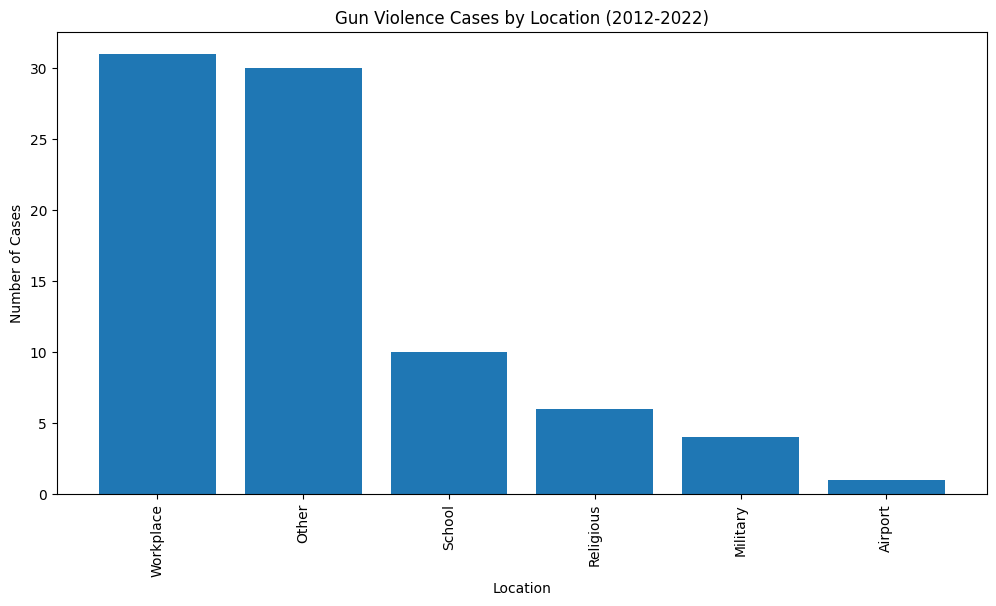

In [35]:
# Filter the data for years between 2010 and 2022
df_years = df[(df['year'] >= 2012) & (df['year'] <= 2022)]

# Get the count of gun violence incidents by location
location_counts = df_years.groupby('location.1').count().sort_values(by='year', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(location_counts.index, location_counts['year'])
plt.title('Gun Violence Cases by Location (2012-2022)')
plt.xlabel('Location')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

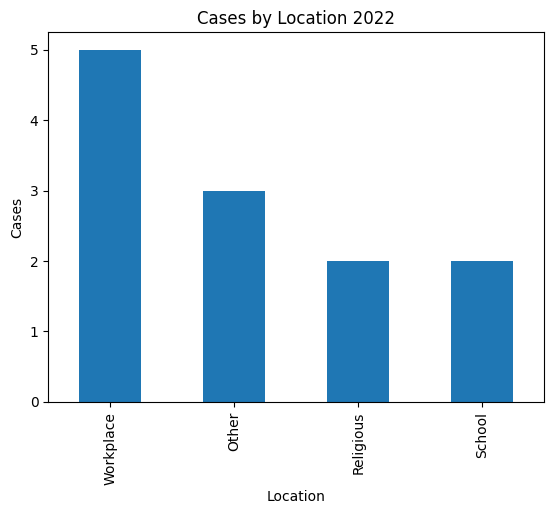

In [36]:
#Cases by Location
counts_by_year = df.groupby(['year'])['location.1'].value_counts()
counts_2022 = counts_by_year.loc[2022]
counts_2022.plot(kind='bar')
plt.title('Cases by Location 2022')
plt.xlabel('Location')
plt.ylabel('Cases')
plt.show()

Based on the data, the majority of gun violence incidents occurred in workplaces and other locations, accounting for 32 and 31 cases respectively. Schools and religious locations accounted for fewer cases, with 12 and 6 incidents respectively, while military and airport locations were the least common, with 4 and 1 cases respectively. 
- Employers should prioritize the safety of their employees by implementing safety protocols and training programs for dealing with active shooter situations. This may include having designated safe areas, conducting active shooter drills, and providing employees with information on how to report any concerning behavior. Additionally, employers should consider implementing background checks and mental health assessments for all employees as a preventive measure.
- Gun violence in various locations, particularly in workplaces and other public areas, through targeted prevention and intervention efforts.

Perpetrator Gender

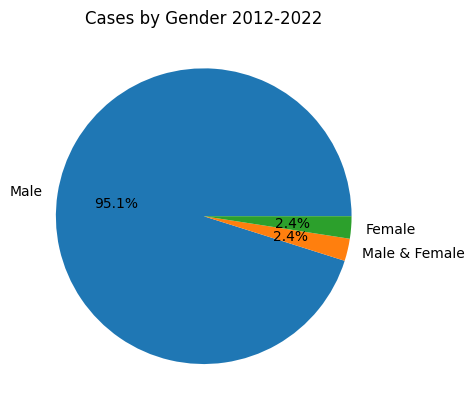

In [37]:
# Filter for years 2012-2022
df_years = df[(df['year'] >= 2012) & (df['year'] <= 2022)]

# Create a pie chart with percentage labels
plt.pie(df_years['gender'].value_counts(), 
        labels=df_years['gender'].unique(), autopct='%1.1f%%')
plt.title('Cases by Gender 2012-2022')
plt.show()

According to the data, 95.1% of the shooters are male. This finding highlights the need to address toxic masculinity and explore why men are more likely to engage in these violent acts. 

Perpetrator Age Group

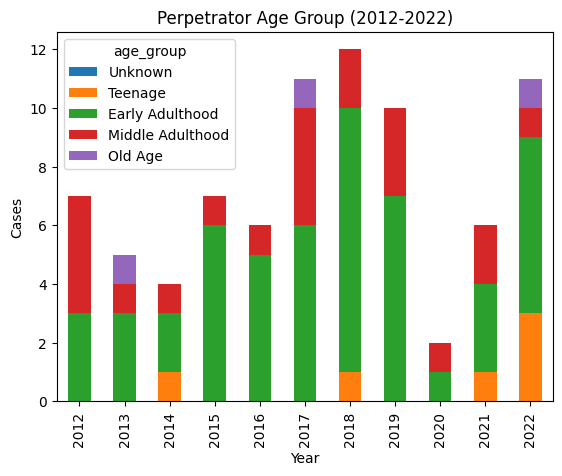

In [38]:
# Filter the DataFrame to include only the rows for years 2012-2022 
df_years = df[(df['year'] >= 2012) & (df['year'] <= 2022)]

# Group data by year and age group, and count the number of incidents for each group
counts_by_year = df_years.groupby(['year', 'age_group']).size().reset_index(name='count')

# Pivot the data to have age groups as columns and years as rows
counts_pivot = counts_by_year.pivot(index='year', columns='age_group', values='count')

# Plot the bar chart
counts_pivot.plot(kind='bar', stacked=True)
plt.title('Perpetrator Age Group (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

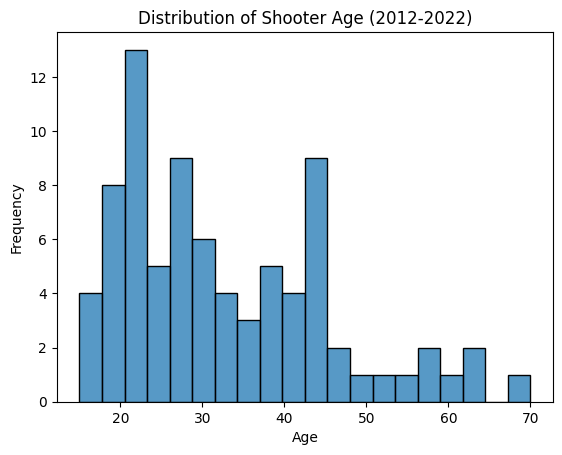

In [39]:
# Filter the DataFrame to include only the rows for years 2012-2022 and exclude age 0
df_years = df[(df['year'] >= 2012) & (df['year'] <= 2022) & (df['age_of_shooter'] != 0)]

# Plot a histogram of shooter age using Seaborn
sns.histplot(data=df_years, x='age_of_shooter', bins=20, kde=False)
plt.title('Distribution of Shooter Age (2012-2022)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show

Based on the data, it can be observed that early adulthood is the most common age group involved in shootings, accounting for 52 incidents. Middle adulthood follows with 22 incidents, while teenage and old age groups account for 6 and 5 incidents respectively. 
- Preventive measures should be taken for early adults, such as improving access to mental health resources and increasing awareness about the potential warning signs of violent behavior
- Targeted interventions should be considered for other age groups based on their unique risk factors.

Fatalities per Month

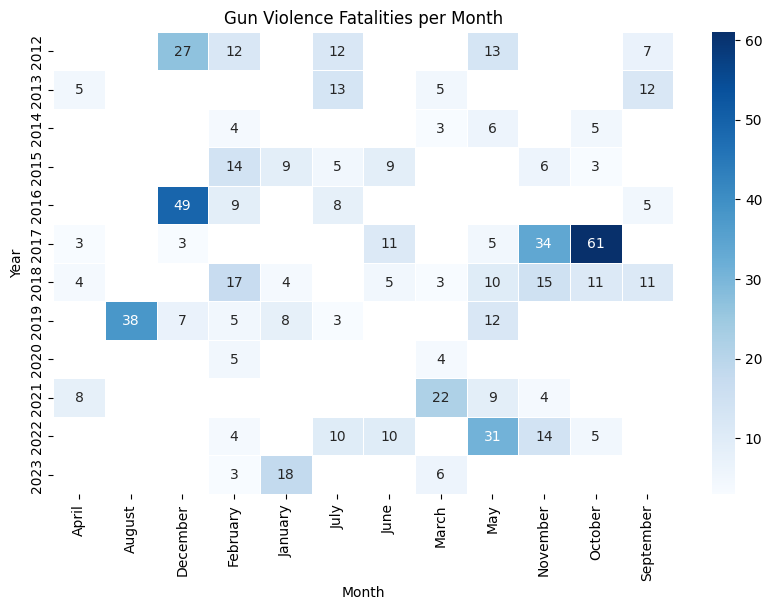

In [40]:
#pivot table of fatalities by year and month
pivot_table = pd.pivot_table(df, values='fatalities', index='year', columns='month_name', aggfunc='sum')

# Create the heatmap using seaborn
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g', linewidths=0.5)
plt.title("Gun Violence Fatalities per Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

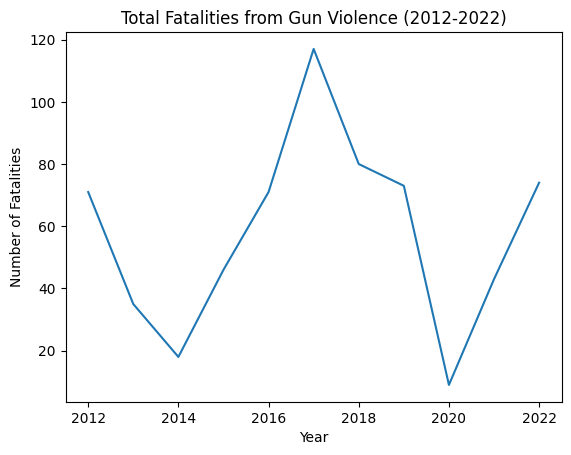

In [41]:
# Filter for years 2012-2022
df_years = df[(df['year'] >= 2012) & (df['year'] <= 2022)]

# Group the data by year and calculate the total number of fatalities for each year
fatalities_by_year = df_years.groupby('year')['fatalities'].sum().reset_index()

# Create the line graph
plt.plot(fatalities_by_year['year'], fatalities_by_year['fatalities'])
plt.title('Total Fatalities from Gun Violence (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.show()

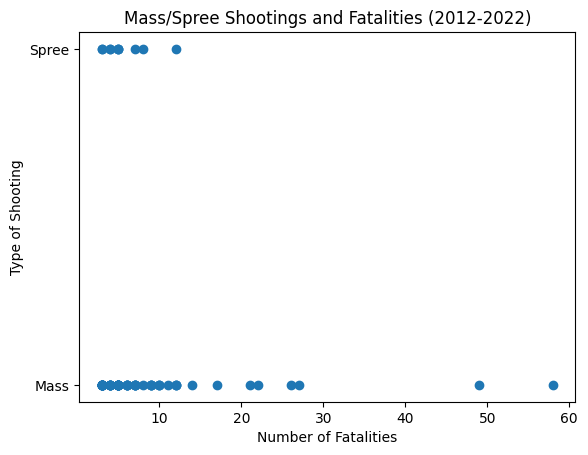

In [42]:
# Filter for 2012-2022
df_years = df[(df['year'] >= 2012) & (df['year'] <= 2022)]

# New DataFrame with columns for mass/spree shooting and fatalities
shootings = df_years[df_years['type'].isin(['Mass', 'Spree'])][['type', 'fatalities']]

plt.scatter(shootings['fatalities'], shootings['type'])
plt.title('Mass/Spree Shootings and Fatalities (2012-2022)')
plt.xlabel('Number of Fatalities')
plt.ylabel('Type of Shooting')
plt.show()

The number of fatalities due to gun violence has been consistently high from 2012 to 2022, with a few peaks and dips.
As per the data 2017 has the most fatalities while 2020 has least.

It appears that there may be a correlation between the type of shooting and the number of fatalities, with Mass shootings resulting in higher numbers of fatalities on average compared to Spree shootings.

-Factors contributing to the severity of these shootings should be analyzed furher in order to develop more effective measures for prevention and response.

Gun Violence by State

In [43]:
# Filter the DataFrame for year 2012-2022
df = df[df['year'].between(2012, 2022)]

# count of gun violence incidents by state
state_counts = df.groupby('State')['State'].count()

# Create a treemap 
fig = px.treemap(
    names=state_counts.index,
    parents=['USA'] * len(state_counts),
    values=state_counts.values,
    title='Gun Violence by State (2012-2022)',
)
fig.show()

California had the highest number of incidents with 15 reported shootings indicating a high level of gun violence in the state, followed by florida and Texas with 7 cases and Colorado with 6 cases while other states had less than 4 reported incidents.
- Policymakers and community leaders should work together to identify the root causes of gun violence in their states.
- There should be a comprehensive review of current gun laws and policies, identification of potential risk factors and preventative measures, and engagement with local communities to help raise awareness and support for initiatives aimed at reducing gun violence.

Perpetrator's Mental Health

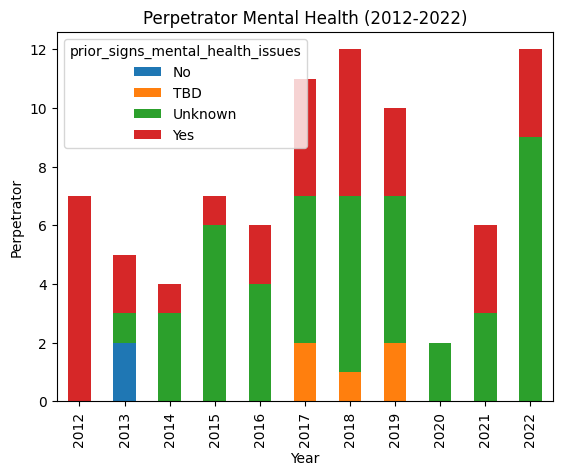

In [44]:
# Filter the DataFrame to include only the rows for years 2012-2022 
df_years = df[(df['year'] >= 2012) & (df['year'] <= 2022)]

# Group data by year and age group, and count the number of incidents for each group
counts_by_year = df_years.groupby(['year', 'prior_signs_mental_health_issues']).size().reset_index(name='count')

# Pivot the data to have age groups as columns and years as rows
counts_pivot = counts_by_year.pivot(index='year', columns='prior_signs_mental_health_issues', values='count')

# Plot the bar chart
counts_pivot.plot(kind='bar', stacked=True)
plt.title('Perpetrator Mental Health (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Perpetrator')
plt.show()

Based on the data available, it appears that mental health is often unknown in cases of gun violence, with over 50% of cases having an unknown mental health status. However, in cases where mental health status is known, individuals with mental health issues are involved in a significant number of incidents.
- The need for better mental health resources and support, as well as measures to prevent individuals with mental health conditions from accessing firearms.
- Individuals should be encouraged to check and take care of their mental health.

Gun Obtained

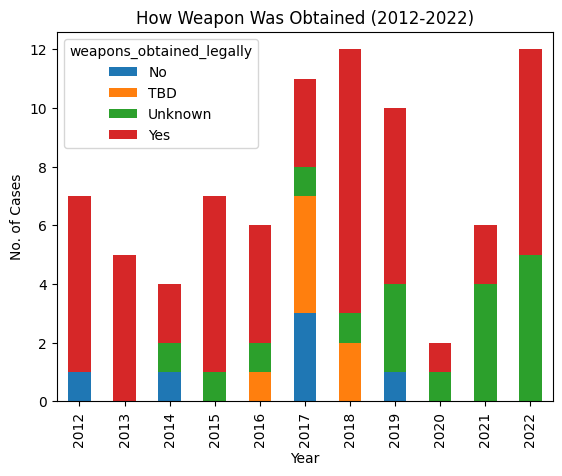

In [45]:
# Filter the DataFrame to include only the rows for years 2012-2022 
df_years = df[(df['year'] >= 2012) & (df['year'] <= 2022)]

# Group data by year and weapons_obtained_legally, and count the number of incidents for each group
counts_by_year = df_years.groupby(['year', 'weapons_obtained_legally']).size().reset_index(name='count')

# Pivot the data to have weapons_obtained_legally as columns and years as rows
counts_pivot = counts_by_year.pivot(index='year', columns='weapons_obtained_legally', values='count')

# Plot the bar chart
counts_pivot.plot(kind='bar', stacked=True)
plt.title('How Weapon Was Obtained (2012-2022)')
plt.xlabel('Year')
plt.ylabel('No. of Cases')
plt.show()

Cases by Race

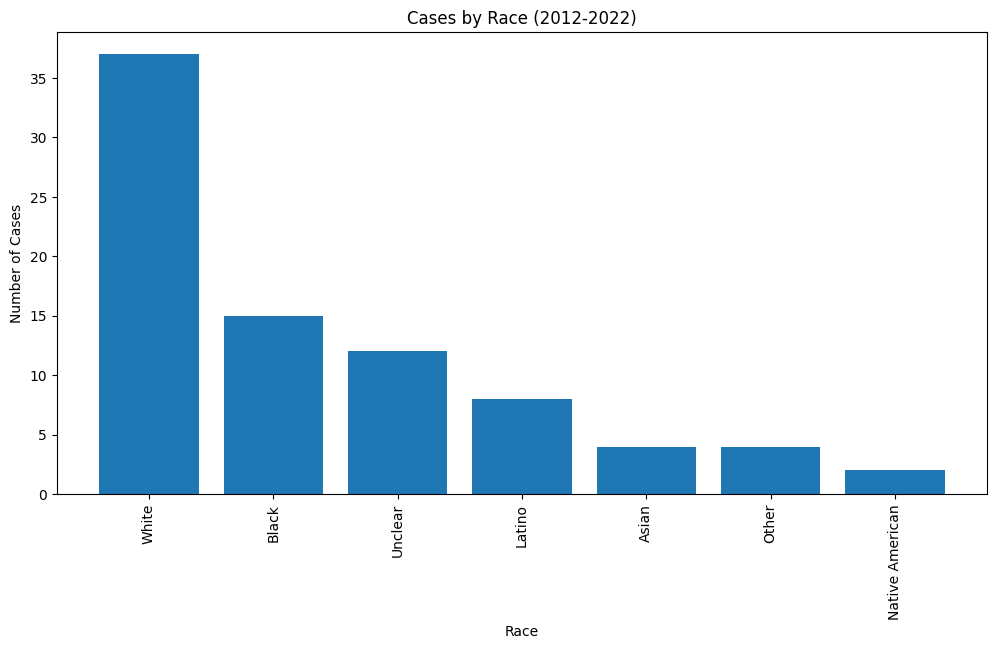

In [46]:
# Filter the data for years between 2010 and 2022
df_years = df[(df['year'] >= 2012) & (df['year'] <= 2022)]

# Get the count of gun violence incidents by location
location_counts = df_years.groupby('race').count().sort_values(by='year', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(location_counts.index, location_counts['year'])
plt.title('Cases by Race (2012-2022)')
plt.xlabel('Race')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

A significant portion of shooters were reported to be white followed by balck and unclear. 
- Factors that contribute to white and black individuals being invoved in mass/spree shootings should be further examined.
-  More accurate and comprehensive reporting of data related to gun violence, including perpetrator demographics, in order to better understand and address this issue.
